In [1]:
# Utilities
import os
import sys
import random
from tqdm import tqdm

# 图像处理库
import cv2
import matplotlib.pyplot as plt

In [2]:
# 根目录
ROOT_DIR = os.getcwd()

# 验证资料路径
DATA_PATH = os.path.join(ROOT_DIR, "data")

# 验证图片路径
TEST_IMGS_PATH = os.path.join(DATA_PATH, "images")

# 权重路径
MODEL_PATH = os.path.join(ROOT_DIR, "model")

# OpenCV的Haar模型路径
CV2_MODEL_PATH = os.path.join(MODEL_PATH, "cv2")

# Haar权重
HAAR_WEIGHT_FILE = os.path.join(CV2_MODEL_PATH,
                                "haarcascade_frontalface_alt2.xml")

In [3]:
# cv2.CascadeClassifier生成实例
facesDetector = cv2.CascadeClassifier(HAAR_WEIGHT_FILE)

In [4]:
# 用來测试OpenCV自帶的Haar人脸侦测
test_image = os.path.join(TEST_IMGS_PATH, "timg.jpg")  # <-- 俢改不同的图像比較效果

In [5]:
# 使用OpenCV读取測試图像

# 注意: OpenCV读取的图像产生的的Numpy Ndaary格式是BGR (B:Blue, G: Green, R: Red)
#      跟使用PIL或skimage的格式RGB (R: Red, G: Green, B:Blue)在色阶(channel)的顺序上有所不同
bgr_image = cv2.imread(test_image)

# 将BGR转换成灰度
gray_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2GRAY)

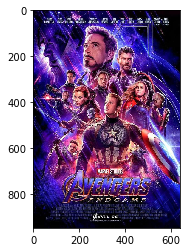

In [6]:
# 展示源图
plt.imshow(bgr_image[:, :, ::-1])  # Matplotlib在打印图像预期是RGB格式, 因此在这里把BGR转换成RGB
plt.show()

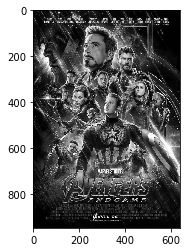

In [7]:
# 展示灰阶图像
plt.imshow(gray_image, cmap='gray')
plt.show()

In [8]:
# detectMultiScale方法它可以检测出图片中所有的人臉，並將人脸用向量保存各个人脸的坐标，大小（用矩形表示）
faces = facesDetector.detectMultiScale(gray_image, 1.3, 5)

# 检测出來的結果的资料结构 (x, y, w, h) -> 左上角的(x,y)坐标, 以及矩型的宽高(w, h)
print("Faces detected: ", len(faces))
print("Result data shape: ", faces.shape)
print("1st data: ", faces[0])

Faces detected:  6
Result data shape:  (6, 4)
1st data:  [140 274  39  39]


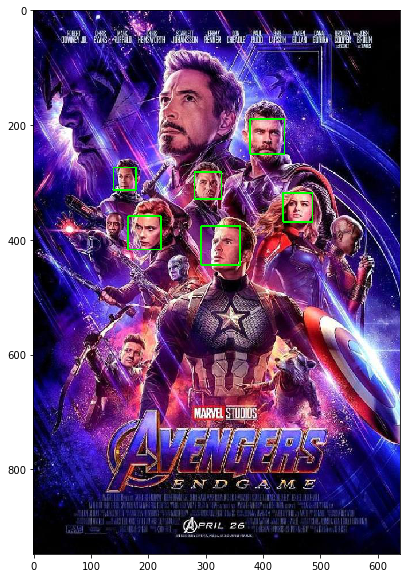

In [9]:
# 迭代每一個检测的人脸位置 (x, y, w, h) -> 左上角的(x,y)座標, 以及矩型的寬高(w, h)
for (x, y, w, h) in faces:
    # 通过OpenCV來把边界框画出来
    # rectangle
    # 參數:
    #     矩形的图像
    #     左上角坐标 tuple (x, y)
    #     右下角坐标 tuple (x, y)
    #     边框颜色 tuple (r,g,b)
    #     边框宽度 int
    cv2.rectangle(bgr_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# 展示結果
plt.figure(figsize=(20, 10))
plt.imshow(bgr_image[:, :, ::-1])
plt.show()